In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


In [22]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [23]:
# read csv file using pandas
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Machine Learning/Week2/training/Mobile.csv')

In [24]:
# to display the top 5 rows of the dataframe
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2000000,0,1,0,7,0.6000000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5000000,1,0,1,53,0.7000000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5000000,1,2,1,41,0.9000000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5000000,0,0,0,10,0.8000000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2000000,0,13,1,44,0.6000000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [25]:
# to display the dimension of the dataframe
df.shape

(2000, 21)

In [26]:
# to display the column names of the dataframe
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [27]:
# check the datatypes
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [28]:
# Check value counts for price range
pd.value_counts(df['price_range'])


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [29]:
pd.value_counts(df['wifi'])

1    1014
0     986
Name: wifi, dtype: int64

In [30]:
# describe the numerical data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000,2000.0000000
mean,1238.5185000,0.4950000,1.5222500,0.5095000,4.3095000,0.5215000,32.0465000,0.5017500,140.2490000,4.5205000,9.9165000,645.1080000,1251.5155000,2124.2130000,12.3065000,5.7670000,11.0110000,0.7615000,0.5030000,0.5070000,1.5000000
std,439.4182061,0.5001000,0.8160042,0.5000348,4.3414437,0.4996625,18.1457150,0.2884155,35.3996549,2.2878367,6.0643149,443.7808108,432.1994469,1084.7320436,4.2132450,4.3563976,5.4639552,0.4262729,0.5001160,0.5000760,1.1183136
min,501.0000000,0.0000000,0.5000000,0.0000000,0.0000000,0.0000000,2.0000000,0.1000000,80.0000000,1.0000000,0.0000000,0.0000000,500.0000000,256.0000000,5.0000000,0.0000000,2.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,851.7500000,0.0000000,0.7000000,0.0000000,1.0000000,0.0000000,16.0000000,0.2000000,109.0000000,3.0000000,5.0000000,282.7500000,874.7500000,1207.5000000,9.0000000,2.0000000,6.0000000,1.0000000,0.0000000,0.0000000,0.7500000
50%,1226.0000000,0.0000000,1.5000000,1.0000000,3.0000000,1.0000000,32.0000000,0.5000000,141.0000000,4.0000000,10.0000000,564.0000000,1247.0000000,2146.5000000,12.0000000,5.0000000,11.0000000,1.0000000,1.0000000,1.0000000,1.5000000
75%,1615.2500000,1.0000000,2.2000000,1.0000000,7.0000000,1.0000000,48.0000000,0.8000000,170.0000000,7.0000000,15.0000000,947.2500000,1633.0000000,3064.5000000,16.0000000,9.0000000,16.0000000,1.0000000,1.0000000,1.0000000,2.2500000
max,1998.0000000,1.0000000,3.0000000,1.0000000,19.0000000,1.0000000,64.0000000,1.0000000,200.0000000,8.0000000,20.0000000,1960.0000000,1998.0000000,3998.0000000,19.0000000,18.0000000,20.0000000,1.0000000,1.0000000,1.0000000,3.0000000


In [31]:
# check for missing values
missing_values = df.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [32]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0000000,0.0112516,0.0114816,-0.0418468,0.0333344,0.0156646,-0.0040037,0.0340845,0.0018444,-0.0297273,0.0314407,0.0149008,-0.0084018,-0.0006529,-0.0299586,-0.0214209,0.0525104,0.0115222,-0.0105158,-0.0083429,0.2007226
blue,0.0112516,1.0000000,0.0214187,0.0351981,0.0035932,0.0134431,0.0411772,0.0040492,-0.0086046,0.0361607,-0.0099522,-0.0068724,-0.0415334,0.0263509,-0.0029523,0.0006131,0.0139337,-0.0302362,0.0100607,-0.0218632,0.0205729
clock_speed,0.0114816,0.0214187,1.0000000,-0.0013152,-0.0004339,-0.0430734,0.0065451,-0.0143644,0.0123497,-0.0057242,-0.0052450,-0.0145229,-0.0094757,0.0034430,-0.0290776,-0.0073784,-0.0114319,-0.0464335,0.0197558,-0.0244710,-0.0066057
dual_sim,-0.0418468,0.0351981,-0.0013152,1.0000000,-0.0291228,0.0031865,-0.0156790,-0.0221417,-0.0089794,-0.0246581,-0.0171426,-0.0208753,0.0142905,0.0410720,-0.0119493,-0.0166661,-0.0394040,-0.0140076,-0.0171174,0.0227403,0.0174445
fc,0.0333344,0.0035932,-0.0004339,-0.0291228,1.0000000,-0.0165597,-0.0291328,-0.0017911,0.0236180,-0.0133562,0.6445953,-0.0099899,-0.0051756,0.0150990,-0.0110140,-0.0123726,-0.0068286,0.0017926,-0.0148278,0.0200849,0.0219982
four_g,0.0156646,0.0134431,-0.0430734,0.0031865,-0.0165597,1.0000000,0.0086900,-0.0018233,-0.0165367,-0.0297055,-0.0055982,-0.0192362,0.0074482,0.0073135,0.0271655,0.0370050,-0.0466278,0.5842456,0.0167578,-0.0176200,0.0147717
int_memory,-0.0040037,0.0411772,0.0065451,-0.0156790,-0.0291328,0.0086900,1.0000000,0.0068858,-0.0342142,-0.0283104,-0.0332734,0.0104413,-0.0083349,0.0328132,0.0377711,0.0117305,-0.0027903,-0.0093660,-0.0269987,0.0069930,0.0444350
m_dep,0.0340845,0.0040492,-0.0143644,-0.0221417,-0.0017911,-0.0018233,0.0068858,1.0000000,0.0217561,-0.0035039,0.0262824,0.0252629,0.0235663,-0.0094341,-0.0253478,-0.0183881,0.0170026,-0.0120654,-0.0026375,-0.0283527,0.0008530
mobile_wt,0.0018444,-0.0086046,0.0123497,-0.0089794,0.0236180,-0.0165367,-0.0342142,0.0217561,1.0000000,-0.0189888,0.0188439,0.0009393,0.0000898,-0.0025805,-0.0338547,-0.0207605,0.0062085,0.0015506,-0.0143682,-0.0004094,-0.0303022
n_cores,-0.0297273,0.0361607,-0.0057242,-0.0246581,-0.0133562,-0.0297055,-0.0283104,-0.0035039,-0.0189888,1.0000000,-0.0011926,-0.0068721,0.0244799,0.0048683,-0.0003148,0.0258265,0.0131479,-0.0147327,0.0237742,-0.0099635,0.0043993


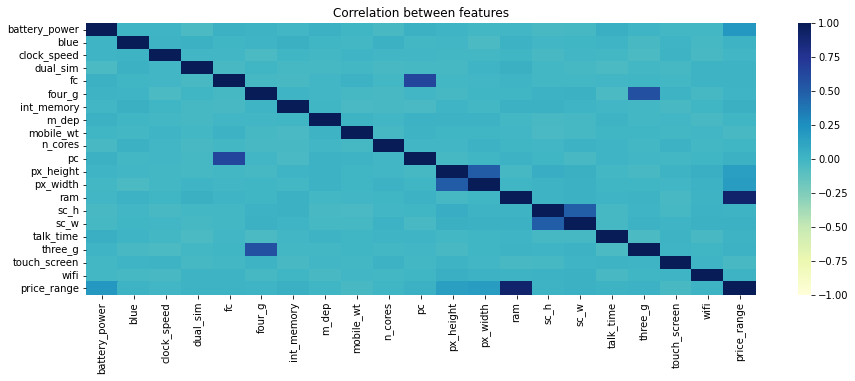

In [33]:
# To get a correlation matrix 
# Ploting correlation plot
corr = df.corr() 
plt.figure(figsize=(15, 5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()

In [34]:
# Check Frequency count between price range and ram
pd.crosstab(df['ram'],df['price_range'])

price_range,0,1,2,3
ram,,,,
256,1,0,0,0
258,2,0,0,0
259,1,0,0,0
262,1,0,0,0
263,1,0,0,0
265,1,0,0,0
267,1,0,0,0
273,1,0,0,0
277,1,0,0,0


In [ ]:
# Check pairplot

dff = df[['battery_power', 'clock_speed', 'dual_sim', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
       'touch_screen', 'price_range']]

sns.pairplot(dff, diag_kind='kde', hue = 'price_range' , markers=["o", "s", "D","h"])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

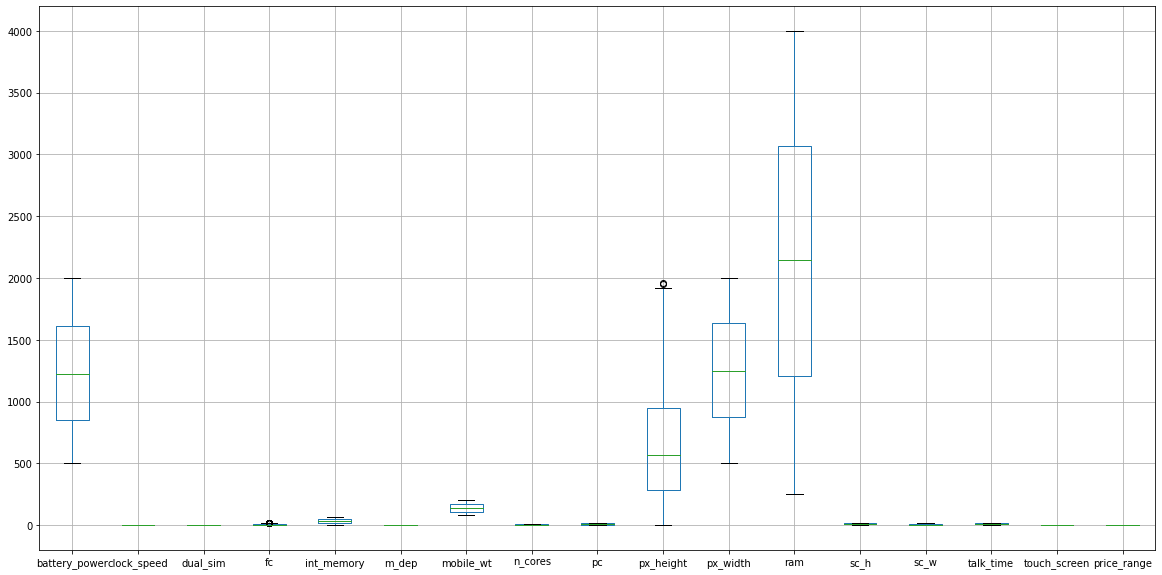

In [ ]:
# create a boxplot for all the continuous features
df.boxplot(column = ['battery_power', 'clock_speed', 'dual_sim', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
       'touch_screen', 'price_range'], figsize = (20,10))

In [35]:
df['px_height'].describe()

count   2000.0000000
mean     645.1080000
std      443.7808108
min        0.0000000
25%      282.7500000
50%      564.0000000
75%      947.2500000
max     1960.0000000
Name: px_height, dtype: float64

#Logistic regression

In [36]:
# Select independent features for model building. ( ID is dropped)
X = df.iloc[:,:20]

y = df['price_range']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(1400, 20)
(600, 20)


In [37]:
X.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2000000,0,1,0,7,0.6000000,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5000000,1,0,1,53,0.7000000,136,3,6,905,1988,2631,17,3,7,1,1,0


In [38]:
# import logistic regression and train on tarining set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
# Predict price range of test data
y_pred = model.predict(X_test)
y_pred

array([0, 2, 0, 3, 1, 2, 2, 0, 3, 3, 0, 1, 2, 3, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 3, 2, 2, 2, 0,
       3, 3, 1, 1, 2, 1, 0, 1, 2, 0, 0, 3, 1, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 1,
       0, 0, 3, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 2, 3, 1, 1, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 2, 0, 2, 3, 1, 3, 1, 1, 3, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 2, 2, 0, 1, 0, 0, 3, 3,

In [40]:
# Let's measure the accuracy of this model's prediction
accuracy_score(y_test, y_pred)

0.635

In [41]:
# And some other metrics 

print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.52      0.51      0.51       146
           2       0.51      0.53      0.52       148
           3       0.71      0.74      0.72       155

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.64      0.64      0.64       600



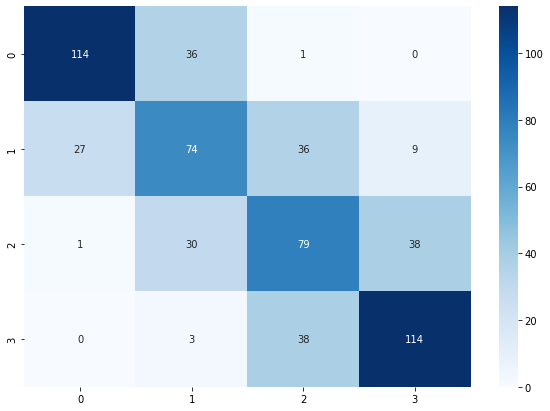

In [42]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

#Standardize the data

In [43]:
# import zscore for scaling the data
from scipy.stats import zscore

In [44]:
# Apply zscore on independent features
xtrainsc = X_train.apply(zscore)
xtestsc = X_test.apply(zscore)

In [ ]:
# Fit the logistic regression model on scaled data 

model1 = LogisticRegression(random_state=0)
model1.fit(xtrainsc, y_train)

In [46]:
model1.score(xtrainsc, y_train)

0.9764285714285714

In [47]:
model1.score(xtestsc, y_test)

0.9616666666666667

In [48]:
ypred = model1.predict(xtestsc)

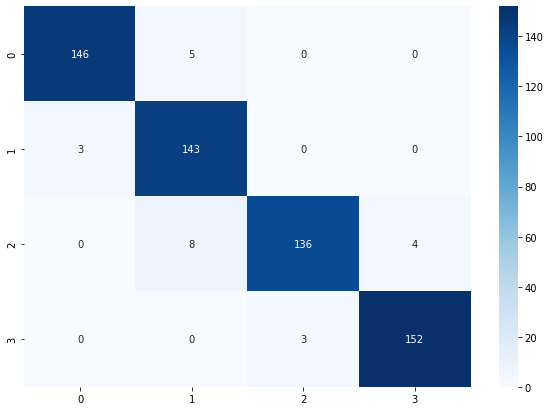

In [49]:
conf_mat = confusion_matrix(y_test, ypred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [50]:
model1.classes_

array([0, 1, 2, 3])

In [51]:
model1.intercept_

array([-3.08710844,  3.07267271,  3.01154574, -2.99711001])

In [52]:
xtestsc.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.9558543,-0.9966722,1.2411641,-0.9543731,-0.3217990,0.9867544,-0.3688545,0.3798969,1.7063953,-1.0652543,-0.8039873,-0.9890888,0.7897049,-1.3235525,-1.0995713,-0.0080922,-0.0290179,0.5696519,1.0000000,-1.0513150
353,-0.1213434,-0.9966722,-1.2768358,-0.9543731,0.5911060,0.9867544,-1.3198951,0.0340120,-0.0374553,1.5831680,0.9808482,-0.8475941,-0.6364160,0.3992606,1.5355669,2.5351596,1.4527484,0.5696519,-1.0000000,-1.0513150


In [53]:
model1.coef_

array([[-2.59912767e+00,  4.05587152e-02,  1.22144707e-01,
         1.10047789e-01, -8.87067978e-02, -1.38342799e-02,
        -2.05756490e-01,  6.22005229e-02,  3.91115798e-01,
        -5.41981252e-02,  1.94562323e-02, -1.53268998e+00,
        -1.45301820e+00, -1.03693293e+01, -1.43736994e-02,
        -6.51939588e-02, -4.54990015e-02, -8.06139079e-02,
         6.32555760e-02,  5.49105094e-02],
       [-8.59875806e-01, -2.24420882e-02, -9.41895577e-03,
        -1.69732565e-02,  1.80352034e-02,  3.70876336e-02,
        -3.70316488e-02,  1.72412824e-01,  1.73341549e-01,
        -8.68294518e-02, -2.66983719e-02, -4.10954795e-01,
        -5.31868238e-01, -3.28130647e+00, -6.06328666e-02,
        -7.78854228e-02, -4.51532826e-02, -2.39063616e-02,
        -1.22551254e-03,  1.00852983e-01],
       [ 8.31834302e-01, -3.48848683e-03, -4.67694352e-02,
        -8.93667974e-02,  5.69908825e-02, -6.52403664e-02,
        -4.54878883e-02, -8.75395819e-02, -5.81960275e-02,
         1.90903023e-02,  3.1

### Here, we can see high correlation with " battery, px_height, px_width, and ram"

#Conclusion
1. We are able to classify price range with an accuracy of 96%
2. 'RAM' seems to be highly correlated with the price range
3. 'battery power' is also an deciding factor of the price
4. Few features like clock_speed, m_dep, n_cross are not having much relationship with price range
5. Standardization of data improves accuracy drastically
6. Few cases were misclassified. However, there were zero misclassification in far classes ( like none of the low cost prices were predicted as high cost). Hence we can say that our model is good for production. 

#Comments


1. This is a classification task hence Logistic Regression is used here. We can apply any other classification algorithms like SVM, Decision Tree, kNN, Naive Bayes etc and compare results.

2. We can see that price range ( dependent variable)  is linearly dependent on a few independent variables like 'RAM', battery, height, width. Hence, it makes sense to use Logistic Regression. 

3. Since Logistic Regression is interpretable, we can infer which features are influencing price range the most. 